In [2]:
from torch import empty
import math
import numpy as np
import random
from framework import *
torch.set_grad_enabled(False)

In [3]:
#function to generate the data
def generate_disc_set(nb):
    input_ = torch.empty(nb, 2).uniform_(0, 1)
    target = (input_-0.5).pow(2).sum(1).sub(1 / (math.pi*2)).sign().add(1).div(2).long()
    target= 1 -target
    target = 2*target -1 
    return input_, target

In [4]:
def training(train_data, train_target, net, optimizer, epochs, batch_size, permute = False, sigm=False):
    N=train_data.shape[0]
    losses_log = []
    for e in range(epochs):
        acc_loss=0
        if permute:
            indices = list(range(len(tensor)))
            random.shuffle(indices)
            train_data_shuffled = train_data[indices]
            train_target_shuffled = train_target[indices]
        else:
            train_data_shuffled = train_data
            train_target_shuffled = train_target

        for b in range(0, N, batch_size):
            predictions = net.forward(train_data_shuffled[b:b+batch_size])
            if not sigm:
                l= loss.forward(predictions, train_target_shuffled[b:b+batch_size].unsqueeze(-1))
            else:
                l= loss.forward(predictions, train_target_shuffled[b:b+batch_size])
            acc_loss += l
            optimizer.zero_grad()

            net.backward(loss.backward())

            new_par = optimizer.step()
            net.set_parameters(new_par)

        #print(e, '   MSE loss = ' , acc_loss.item()) 
        losses_log += [acc_loss.item()]
    return torch.tensor(losses_log)

In [5]:
#counting corrects on test
def test_tanh(net, test_data, test_target, verbose = False):
    correct_count=0
    for i in range(test_data.shape[0]):
            x=test_data[i]
            y=test_target[i]

            y_pred = net.forward(x.unsqueeze(0))

            correct = y_pred.sign()*y>0
            if verbose:
                print('prediction output \t', round(y_pred.item(), 2), '\t\treal output\t', round(y.item(), 2),'\t\tcorrect prediction?', correct.item())
            if correct : correct_count += 1

    print('Correct predictions after '+str(epochs)+' training steps: '+str(correct_count/test_data.shape[0]*100)+' %')
    return correct_count

In [6]:
#counting corrects on test
def test_sig(net, test_data, test_target, verbose = False):
    correct_count=0
    for i in range(test_data.shape[0]):
            x=test_data[i]
            y=test_target[i]

            y_pred = net.forward(x.unsqueeze(0))

            correct = y_pred.argmax()==y.argmax()
            if verbose:
                print('prediction output \t', y_pred, y_pred.argmax(), '\t\treal output\t', y, y.argmax(),'\t\tcorrect prediction?', correct)
            if correct : correct_count += 1

    print('Correct predictions after '+str(epochs)+' training steps: '+str(correct_count/test_data.shape[0]*100)+' %')
    return correct_count

In [7]:
def convert_to_one_hot_labels(input, target):
    tmp = input.new_zeros(target.size(0), target.max() + 1)
    tmp.scatter_(1, target.view(-1, 1), 1.0)
    return tmp

In [8]:
N_data_point = 1000
train_data, train_target= generate_disc_set(N_data_point)
test_data,  test_target = generate_disc_set(N_data_point)
#lets try not to normalize it: since it is in [0, 1]^2 this is just a traslation and a sqrt(3) resizing in both directions

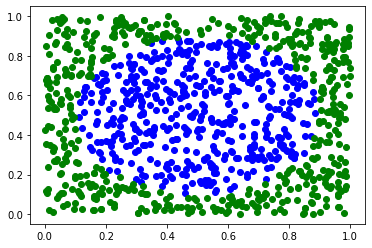

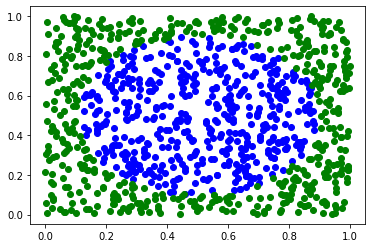

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.plot(train_data[:,0][train_target==1], train_data[:,1][train_target==1],'bo')
plt.plot(train_data[:,0][train_target!=1], train_data[:,1][train_target!=1],'go')

fig = plt.figure()
plt.plot(test_data[:,0][test_target==1], test_data[:,1][test_target==1],'bo')
plt.plot(test_data[:,0][test_target!=1], test_data[:,1][test_target!=1],'go')

In [39]:
n_tries=100

In [40]:
##########################################################################################################################
## Homemade sequential linear + tanh

In [41]:
error=[]
for i in range(n_tries):
    train_data, train_target= generate_disc_set(N_data_point)
    test_data,  test_target = generate_disc_set(N_data_point)
    linear1 = Linear(2, 25, True)
    linear2 = Linear(25,25,True)
    linear3 = Linear(25,25,True)
    linear4 = Linear(25,1,True)
    sigma1 = Tanh()
    sigma2 = Tanh()
    sigma3 = Tanh()
    sigma4 = Tanh()

    loss = MSE()

    net = Sequential([
        linear1, 
        sigma1 ,
        linear2,
        sigma2 ,
        linear3,
        sigma3 ,
        linear4,
        sigma4
    ])
    optimizer = SGD(lr = 1e1,momentum=False, parameters = net.get_parameters())
    epochs=100
    batch_size = 100
    losses_log = training(train_data, train_target, net, optimizer, epochs, batch_size)
    error.append(test_tanh(net, test_data, test_target, verbose = False))
print('Mean error: '+str(np.asarray(error).mean()/10)+'% Standard deviation: '+str(np.asarray(error).std()/10))

Correct predictions after 100 training steps: 94.19999999999999 %
Correct predictions after 100 training steps: 90.2 %
Correct predictions after 100 training steps: 90.2 %
Correct predictions after 100 training steps: 93.8 %
Correct predictions after 100 training steps: 93.2 %
Correct predictions after 100 training steps: 88.3 %
Correct predictions after 100 training steps: 95.7 %
Correct predictions after 100 training steps: 96.1 %
Correct predictions after 100 training steps: 95.6 %
Correct predictions after 100 training steps: 95.1 %
Correct predictions after 100 training steps: 93.8 %
Correct predictions after 100 training steps: 85.39999999999999 %
Correct predictions after 100 training steps: 91.2 %
Correct predictions after 100 training steps: 93.8 %
Correct predictions after 100 training steps: 91.4 %
Correct predictions after 100 training steps: 90.7 %
Correct predictions after 100 training steps: 88.8 %
Correct predictions after 100 training steps: 94.8 %
Correct predictions 

In [42]:
error=[]
for i in range(n_tries):
    train_data, train_target= generate_disc_set(N_data_point)
    test_data,  test_target = generate_disc_set(N_data_point)
    linear1 = Linear(2, 25, True)
    linear2 = Linear(25,25,True)
    linear3 = Linear(25,25,True)
    linear4 = Linear(25,1,True)
    sigma1 = Tanh()
    sigma2 = Tanh()
    sigma3 = Tanh()
    sigma4 = Tanh()

    loss = MSE()

    net = Sequential([
        linear1, 
        sigma1 ,
        linear2,
        sigma2 ,
        linear3,
        sigma3 ,
        linear4,
        sigma4
    ])
    optimizer = SGD(lr = 10.,momentum=True, parameters = net.get_parameters())
    epochs=100
    batch_size = 100
    losses_log = training(train_data, train_target, net, optimizer, epochs, batch_size)
    error.append(test_tanh(net, test_data, test_target, verbose = False))
print('Mean error: '+str(np.asarray(error).mean()/10)+'% Standard deviation: '+str(np.asarray(error).std()/10))

Correct predictions after 100 training steps: 92.10000000000001 %
Correct predictions after 100 training steps: 93.2 %
Correct predictions after 100 training steps: 97.0 %
Correct predictions after 100 training steps: 94.6 %
Correct predictions after 100 training steps: 85.7 %
Correct predictions after 100 training steps: 95.5 %
Correct predictions after 100 training steps: 94.1 %
Correct predictions after 100 training steps: 88.2 %
Correct predictions after 100 training steps: 95.19999999999999 %
Correct predictions after 100 training steps: 88.5 %
Correct predictions after 100 training steps: 94.1 %
Correct predictions after 100 training steps: 81.89999999999999 %
Correct predictions after 100 training steps: 90.0 %
Correct predictions after 100 training steps: 90.2 %
Correct predictions after 100 training steps: 95.0 %
Correct predictions after 100 training steps: 92.5 %
Correct predictions after 100 training steps: 94.19999999999999 %
Correct predictions after 100 training steps: 8

In [43]:
##########################################################################################################################
## Homemade sequential linear + relu. Tanh at the end

In [44]:
error=[]
for i in range(n_tries):
    train_data, train_target= generate_disc_set(N_data_point)
    test_data,  test_target = generate_disc_set(N_data_point)
    linear1 = Linear(2, 25, True)
    linear2 = Linear(25,25,True)
    linear3 = Linear(25,25,True)
    linear4 = Linear(25,1,True)
    sigma1 = ReLu()
    sigma2 = ReLu()
    sigma3 = ReLu()
    sigma4 = Tanh()

    loss = MSE()

    net = Sequential([
        linear1, 
        sigma1 ,
        linear2,
        sigma2 ,
        linear3,
        sigma3 ,
        linear4,
        sigma4
    ])
    optimizer = SGD(lr = 10.,momentum=False, parameters = net.get_parameters())
    epochs=100
    batch_size = 100
    losses_log = training(train_data, train_target, net, optimizer, epochs, batch_size)
    error.append(test_tanh(net, test_data, test_target, verbose = False))
print('Mean error: '+str(np.asarray(error).mean()/10)+'% Standard deviation: '+str(np.asarray(error).std()/10))

Correct predictions after 100 training steps: 93.2 %
Correct predictions after 100 training steps: 96.7 %
Correct predictions after 100 training steps: 95.8 %
Correct predictions after 100 training steps: 85.8 %
Correct predictions after 100 training steps: 94.89999999999999 %
Correct predictions after 100 training steps: 92.30000000000001 %
Correct predictions after 100 training steps: 93.4 %
Correct predictions after 100 training steps: 96.6 %
Correct predictions after 100 training steps: 91.4 %
Correct predictions after 100 training steps: 89.1 %
Correct predictions after 100 training steps: 89.8 %
Correct predictions after 100 training steps: 93.2 %
Correct predictions after 100 training steps: 94.89999999999999 %
Correct predictions after 100 training steps: 90.2 %
Correct predictions after 100 training steps: 91.0 %
Correct predictions after 100 training steps: 94.89999999999999 %
Correct predictions after 100 training steps: 94.39999999999999 %
Correct predictions after 100 trai

In [45]:
error=[]
for i in range(n_tries):
    train_data, train_target= generate_disc_set(N_data_point)
    test_data,  test_target = generate_disc_set(N_data_point)
    linear1 = Linear(2, 25, True)
    linear2 = Linear(25,25,True)
    linear3 = Linear(25,25,True)
    linear4 = Linear(25,1,True)
    sigma1 = ReLu()
    sigma2 = ReLu()
    sigma3 = ReLu()
    sigma4 = Tanh()

    loss = MSE()

    net = Sequential([
        linear1, 
        sigma1 ,
        linear2,
        sigma2 ,
        linear3,
        sigma3 ,
        linear4,
        sigma4
    ])
    optimizer = SGD(lr = 1e1,momentum=True, parameters = net.get_parameters())
    epochs=100
    batch_size = 100
    losses_log = training(train_data, train_target, net, optimizer, epochs, batch_size)
    error.append(test_tanh(net, test_data, test_target, verbose = False))
print('Mean error: '+str(np.asarray(error).mean()/10)+'% Standard deviation: '+str(np.asarray(error).std()/10))

Correct predictions after 100 training steps: 86.5 %
Correct predictions after 100 training steps: 96.5 %
Correct predictions after 100 training steps: 94.8 %
Correct predictions after 100 training steps: 96.7 %
Correct predictions after 100 training steps: 96.8 %
Correct predictions after 100 training steps: 93.0 %
Correct predictions after 100 training steps: 92.7 %
Correct predictions after 100 training steps: 93.2 %
Correct predictions after 100 training steps: 93.4 %
Correct predictions after 100 training steps: 88.6 %
Correct predictions after 100 training steps: 96.1 %
Correct predictions after 100 training steps: 94.3 %
Correct predictions after 100 training steps: 90.10000000000001 %
Correct predictions after 100 training steps: 91.8 %
Correct predictions after 100 training steps: 94.89999999999999 %
Correct predictions after 100 training steps: 88.6 %
Correct predictions after 100 training steps: 96.0 %
Correct predictions after 100 training steps: 92.10000000000001 %
Correct

In [46]:
##########################################################################################################################
## Homemade sequential linear + Relu. Softmax at the end

In [51]:
#handmade sequential linear + relu with softmax with batches
error=[]
for i in range(n_tries):
    train_data, train_target= generate_disc_set(N_data_point)
    test_data,  test_target = generate_disc_set(N_data_point)
    train_target = (train_target + 1).div(2.).to(torch.int64)
    test_target = (test_target + 1).div(2.).to(torch.int64)
    train_target_hot = convert_to_one_hot_labels( train_data, train_target)
    test_target_hot = convert_to_one_hot_labels( test_target, test_target)
    linear1 = Linear(2, 25, True)
    linear2 = Linear(25,25,True)
    linear3 = Linear(25,25,True)
    linear4 = Linear(25,2,True)
    sigma1 = ReLu()
    sigma2 = ReLu()
    sigma3 = ReLu()
    sigma4 = Softmax()

    loss = MSE()

    net = Sequential([
        linear1, 
        sigma1 ,
        linear2,
        sigma2 ,
        linear3,
        sigma3 ,
        linear4,
        sigma4
    ])
    optimizer = SGD(lr = 5e3,momentum=False, parameters = net.get_parameters())
    epochs=100
    batch_size = 100
    losses_log = training(train_data, train_target_hot, net, optimizer, epochs, batch_size,sigm=True)
    error.append(test_sig(net, test_data, test_target_hot, verbose = False))
print('Mean error: '+str(np.asarray(error).mean()/10)+'% Standard deviation: '+str(np.asarray(error).std()/10))

Correct predictions after 100 training steps: 92.80000000000001 %
Correct predictions after 100 training steps: 94.5 %
Correct predictions after 100 training steps: 93.2 %
Correct predictions after 100 training steps: 89.8 %
Correct predictions after 100 training steps: 96.1 %
Correct predictions after 100 training steps: 92.7 %
Correct predictions after 100 training steps: 82.69999999999999 %
Correct predictions after 100 training steps: 92.30000000000001 %
Correct predictions after 100 training steps: 92.80000000000001 %
Correct predictions after 100 training steps: 86.3 %
Correct predictions after 100 training steps: 90.5 %
Correct predictions after 100 training steps: 90.0 %
Correct predictions after 100 training steps: 90.8 %
Correct predictions after 100 training steps: 93.2 %
Correct predictions after 100 training steps: 97.1 %
Correct predictions after 100 training steps: 97.6 %
Correct predictions after 100 training steps: 89.2 %
Correct predictions after 100 training steps: 9

In [ ]:
#handmade sequential linear + relu with softmax with batches
error=[]
for i in range(n_tries):
    train_data, train_target= generate_disc_set(N_data_point)
    test_data,  test_target = generate_disc_set(N_data_point)
    train_target = (train_target + 1).div(2.).to(torch.int64)
    test_target = (test_target + 1).div(2.).to(torch.int64)
    train_target_hot = convert_to_one_hot_labels( train_data, train_target)
    test_target_hot = convert_to_one_hot_labels( test_target, test_target)
    linear1 = Linear(2, 25, True)
    linear2 = Linear(25,25,True)
    linear3 = Linear(25,25,True)
    linear4 = Linear(25,2,True)
    sigma1 = ReLu()
    sigma2 = ReLu()
    sigma3 = ReLu()
    sigma4 = Softmax()

    loss = MSE()

    net = Sequential([
        linear1, 
        sigma1 ,
        linear2,
        sigma2 ,
        linear3,
        sigma3 ,
        linear4,
        sigma4
    ])
    optimizer = SGD(lr = 2e3,momentum=True, parameters = net.get_parameters())
    epochs=100
    batch_size = 100
    losses_log = training(train_data, train_target_hot, net, optimizer, epochs, batch_size,sigm=True)
    error.append(test_sig(net, test_data, test_target_hot, verbose = False))
print('Mean error: '+str(np.asarray(error).mean()/10)+'% Standard deviation: '+str(np.asarray(error).std()/10))

Correct predictions after 100 training steps: 96.39999999999999 %
Correct predictions after 100 training steps: 77.10000000000001 %
Correct predictions after 100 training steps: 93.60000000000001 %
Correct predictions after 100 training steps: 79.10000000000001 %
Correct predictions after 100 training steps: 90.10000000000001 %
Correct predictions after 100 training steps: 85.0 %
Correct predictions after 100 training steps: 97.8 %
Correct predictions after 100 training steps: 92.30000000000001 %
Correct predictions after 100 training steps: 94.3 %
Correct predictions after 100 training steps: 94.5 %
Correct predictions after 100 training steps: 90.9 %
Correct predictions after 100 training steps: 92.4 %
Correct predictions after 100 training steps: 91.5 %
Correct predictions after 100 training steps: 91.3 %
Correct predictions after 100 training steps: 95.39999999999999 %
Correct predictions after 100 training steps: 97.1 %
Correct predictions after 100 training steps: 95.8 %
Correct 